In [985]:
# Import
import pandas as pd
import matplotlib.pyplot as plt #pour nous permettre d'executer la Foction de Correlation
import seaborn as sns
import numpy as np


# 1- Preprocessing part

## A- Importing the dataset

In [986]:
df_Titanic = pd.read_csv('titanic-passengers.csv')
df_Titanic.head()

,PassengerId;Survived;Pclass;Name;Sex;Age;SibSp;Parch;Ticket;Fare;Cabin;Embarked
343;No;2;Collander,Mr. Erik Gustaf;male;28.0;0;0;248740;13.0;;S
76;No;3;Moen,Mr. Sigurd Hansen;male;25.0;0;0;348123;7.65;F...
641;No;3;Jensen,Mr. Hans Peder;male;20.0;0;0;350050;7.8542000...
568;No;3;Palsson,Mrs. Nils (Alma Cornelia Berglund);female;29....
672;No;1;Davidson,Mr. Thornton;male;31.0;1;0;F.C. 12750;52.0;B71;S


In [987]:
#rechargement des donnés (indiquer les séparation)
df_Titanic = pd.read_csv('titanic-passengers.csv', sep= ';')
df_Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


- *Index :*
- *PassengerId: ID unique d'un passager*
- *Survived : Survie (Yes,No)*
- *Pclass: Classe du passager (1,2,3)*
- *Sex: Sexe (male,female)*
- *Age: âge en années*
- *SibSp: nombre de frères et sœurs ou conjoints à bord du Titanic*
- *Parch: nombre de parents ou enfants à bord du Titanic*
- *Ticket: numéro de ticket*
- *Fare: tarif du Ticket passager*
- *Cabin: numéro de cabine*
- *Embarked: port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton*

In [988]:
df_Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 62.7+ KB


In [989]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [990]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [991]:
# affichage des information genéral Columns Values 
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked,Title
count,891,891,891,891,891,891
unique,891,2,681,9,3,6
top,"Futrelle, Mr. Jacques Heath",male,347082,Z,S,Mrs
freq,1,577,7,687,646,643


1. **"Name" et "PassangerID"** sont uniques dans l'ensemble de données (nombre = unique = 891)
2. **"Sex"** a deux valeurs possibles avec 65% d'hommes (top = masculin, fréq = 577 / nombre = 891).
3. **"Cabin"** a plusieurs doublons. ont Conclus que plusieurs passagers partageaient les mêmes cabine.
4. **"Embarked"** prend trois valeurs possibles. Port S utilisé par la plupart des passagers (haut = S)
5. **"Ticket"** a un taux élevé (22%) de valeurs en double (unique = 681).

## B- Data preprocessing

### **Features :** 

**'PassengerId'** peut être supprimée de notre analyse car il n'y ait pas de corrélation entre <u>PassengerId et survie.</u>

**'Name'** peut être supprimée de notre analyse car il n'y ait <u>pas de corrélation entre Name et survie</u>, par contre on peut extraire une information **'Title'** qui dois être analysée.

**'SibSp' et Parch '** leur valeur combiné pour nous informer sur la taille d'une Famille.

**'Age'** pour l'âge, le nombre de Nan est important, je pense que on dois faire des analyse pousser avant de les remplacer **(mais je choisi de mettre des nombre aléatoire pour avancer dans l'exercice )**

**'Ticket'** peut être supprimée de notre analyse car elle contient un taux élevé de doublons (22% dans ) et il se peut qu'il n'y ait <u>pas de corrélation entre Ticket et survie,</u> on peut remarque que le 'Fare' et Ticket sont liées (**'Fare' doublons pour les même 'Ticket'** exemple Ticket  110152 86.50 pounds pour les Passager 258, 505 et 760).  Ce qui explique que l'achat de Ticket fu par groupe Familial

**'Cabin'** pour la Substitution des valeurs NaN : on suppose que tout ceux qui n'étais pas dans des cabines étais regrouper dans même lieu que on remplace par la lettre  "Z", aussi **'Cabin'** est alphanumérique  *"X000"* et pour cette analyse on regroupe **'Cabin'** la premier Lettre.

**'Embarked'** on commence par Substitution des valeurs NaN : 
pour deux valeur manquantes ont choisi de remplir avec les valeur les plus fréquente (utilisé fonction mode)

### **Target :** 

*La probabilité de survie* : pour cet analyse ont doit **substituer la valeur catégorielle en numérique** du Target 'Survived' 

In [992]:
#Crée une copie du DataFrame
df = df_Titanic.copy()

In [993]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [994]:
#Age
np.random.seed(0) #on fixe le random pour avoir les meme donnée a chaque fois
new_Age = np.random.randint(df.Age.mean() - df.Age.std() , df.Age.mean()+ df.Age.std(),
                            size = df.Age.isnull().sum())

df.loc[df.Age.isnull(), 'Age'] = new_Age

In [995]:
#Embarked
df['Embarked'].fillna(df.Embarked.dropna().mode()[0], inplace = True)

In [996]:
#Cabin
df['Cabin'].fillna('Z', inplace = True)

for inx in df.index: # récupérer la Premier lettre et remplacer la ligne
    df.loc[inx,'Cabin'] = (list(df.loc[inx, 'Cabin'])[0])

In [997]:
#Survived
cat_digital = { "Survived" : {"Yes" : 1 , "No" : 0}}

df['Survived'].replace(cat_digital['Survived'], inplace = True)

In [998]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Drop des Features **non corréler**

In [999]:
non_corr = ['PassengerId']
df.drop (non_corr, axis = 1 , inplace = True)

# 2- Visualization part

In [1000]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.284141,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.546245,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Ci-dessus, nous pouvons voir que **38% de l'ensemble des passager ont survécu au Titanic** . Nous pouvons également voir que l'âge des passagers varie de 0,4 à 80 ans. 

[Text(0.5, 1.0, ' - Fare by Passanger - ')]

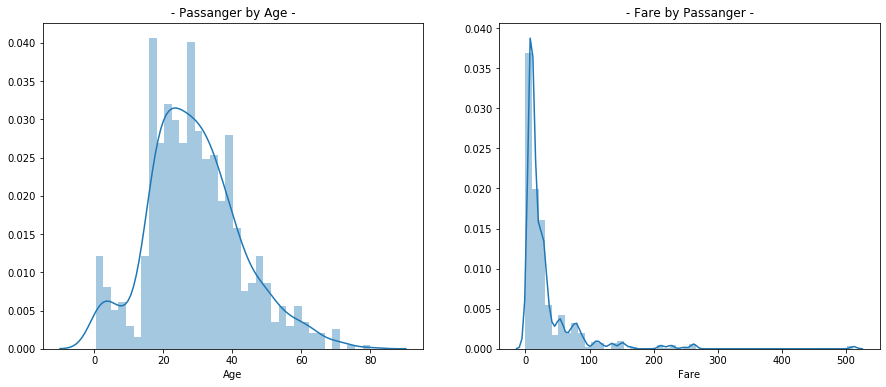

In [1001]:
figure, axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
sns_Data = df['Age']
sns.distplot (sns_Data, ax = axes[0], bins = 36).set(title =' - Passanger by Age - ')
sns_Data = df['Fare']
sns.distplot (sns_Data, ax = axes[1]).set(title =' - Fare by Passanger - ')

L'Age des passager varié de 0,4 a 80 ans**, la plupart des passager est adulte entre 20 et 40 ans 

**Le prix des billets  est relativement bas**, (32 pound en moyenne, plus de 50 % des passager ont payer leur billet moins de 9 pound) avec moins de 10 passager qui on payer leur billet plus 200 pound.

### Survie selon genre et l'âge 'Graph'

Text(0.5, 0.98, 'Corrélation Survie / Age by Sexe')

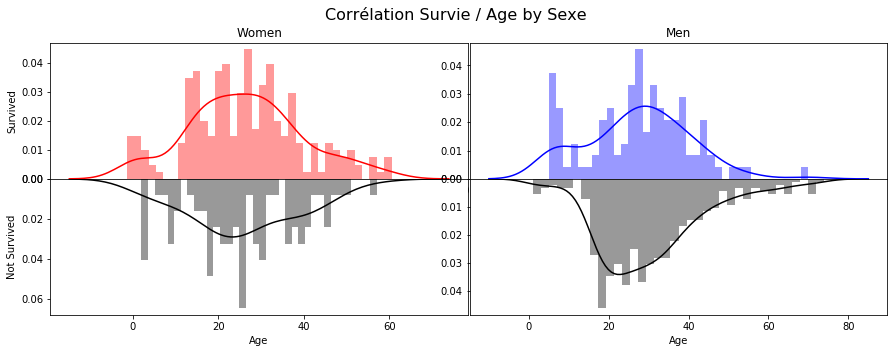

In [1002]:
figure, axes = plt.subplots(nrows=2, ncols=2,figsize=(15, 5),
                            gridspec_kw={'hspace': 0, 'wspace': .005})

mask_mal = df['Sex'] == 'male'
mask_femal = df['Sex'] == 'female'
mask_live = df['Survived'] == 1 
mask_dead = df['Survived'] == 0

ax = sns.distplot(df[mask_femal & mask_live].Age.dropna(),
                  bins=36, ax = axes[(0,0)], kde =True, color= "r")

ax = sns.distplot(df[mask_femal & mask_dead].Age.dropna(),
                  bins=36, ax = axes[(1,0)], kde = True , color= "k")

ax = ax.invert_yaxis()

ax = sns.distplot(df[mask_mal & mask_live].Age.dropna(),
                  bins=36, ax = axes[(0,1)], kde = True, color= "b")

ax = sns.distplot(df[mask_mal & mask_dead].Age.dropna(),
                  bins=36, ax = axes[(1,1)], kde = True, color= "k")

ax = ax.invert_yaxis()

axes[(0,0)].set_title('Women')
axes[(0,1)].set_title('Men')
axes[(0,0)].set_ylabel('Survived')
axes[(1,0)].set_ylabel('Not Survived')
figure.suptitle('Corrélation Survie / Age by Sexe', fontsize=16)

Pour mieux voir les déférents âges, je propose de crée des tranche d'Age

In [1003]:
tranch_Age = pd.cut(df["Age"],bins=[0,2,12,20,35,55,80])
df.groupby([tranch_Age, 'Sex'])['Survived'].mean()

Age       Sex   
(0, 2]    female    0.600000
          male      0.642857
(2, 12]   female    0.590909
          male      0.521739
(12, 20]  female    0.754386
          male      0.127451
(20, 35]  female    0.776978
          male      0.155556
(35, 55]  female    0.714286
          male      0.211679
(55, 80]  female    0.888889
          male      0.129032
Name: Survived, dtype: float64

Les enfants des deux sexes de moins de **12 ans** on une probabilité de survie plus élevée.
cette probabilité de survie est très faible entre **12 et 20 ans** pour les hommes (13%), contrairement au femmes (75 % ) 
ce pourcentage de survie est disproportionné entres les hommes et les femmes a partir de  12 ans, 
avec un maximum entre **55 - 80 ans** ou les femmes ont une probabilité de survie de 88 % contre 12 % pour les hommes.

*(les femmes on une chance de survie minimum de 74 % contre 18 % au maximum pour les hommes)*

<u>**Conclusion :**</u> 

**Les femmes de tout âge et les enfants de moins de 12 ans ont plus de chance de survivre au drame du Titanic.

### La survie selon Class

Text(0.5, 0.98, 'Corrélation Survie / Class by Sexe')

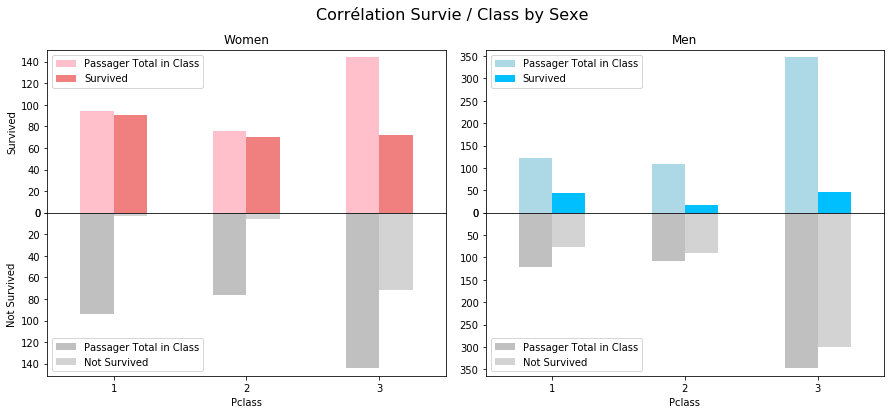

In [1004]:
figure, axes = plt.subplots(nrows=2, ncols=2,figsize=(15, 6), gridspec_kw={'hspace': 0, 'wspace': .1})

long = pd.DataFrame(df.groupby(['Sex','Pclass'])['Pclass'].count()['female'])
long = long.rename(columns = {'Pclass':'Passager Total in Class'})
long['Survived'] = (df[mask_femal & mask_live].Pclass.value_counts())
ax = long.plot(ax=axes[0,0], rot=0, kind='bar', color = {'lightcoral', 'pink'})

long = pd.DataFrame(df.groupby(['Sex','Pclass'])['Pclass'].count()['female'])
long = long.rename(columns = {'Pclass':'Passager Total in Class'})
long['Not Survived'] = (df[mask_femal & mask_dead].Pclass.value_counts())
ax = long.plot(ax=axes[1,0], rot=0, kind='bar',color = {'silver', 'lightgrey'})
ax = ax.invert_yaxis()

long = pd.DataFrame(df.groupby(['Sex','Pclass'])['Pclass'].count()['male'])
long = long.rename(columns = {'Pclass':'Passager Total in Class'})
long['Survived'] = (df[mask_mal & mask_live].Pclass.value_counts())
ax = long.plot(ax=axes[0,1], rot=0, kind='bar', color = {'lightblue', 'deepskyblue'})

long = pd.DataFrame(df.groupby(['Sex','Pclass'])['Pclass'].count()['male'])
long = long.rename(columns = {'Pclass':'Passager Total in Class'})
long['Not Survived'] = (df[mask_mal & mask_dead].Pclass.value_counts())
ax = long.plot(ax=axes[1,1], rot=0, kind='bar',color = {'silver', 'lightgrey'})
ax = ax.invert_yaxis()

axes[(0,0)].set_title('Women')
axes[(0,1)].set_title('Men')
axes[(0,0)].set_ylabel('Survived')
axes[(1,0)].set_ylabel('Not Survived')
figure.suptitle('Corrélation Survie / Class by Sexe', fontsize=16)

Text(0.5, 0.98, 'Corrélation Survie / Class')

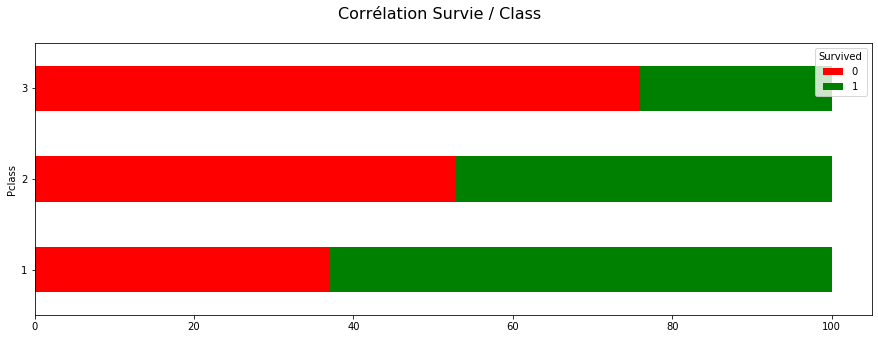

In [1005]:
figure, axes = plt.subplots(nrows=1, ncols=1,figsize=(15, 5))
df.groupby(['Pclass', 'Survived']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(ax = axes, kind='barh',stacked=True, color = 'rg')
figure.suptitle('Corrélation Survie / Class', fontsize=16)

**La probabilité  de survie augmente par rapport a la class.**
Pour la troisième classe on remarque que 87 % des hommes dans la même classe ont périe,  ce qui représente a eux seul 51 % de total des hommes de échantillon.

*Pour les femmes :*
96 % des femmes de la premier classe en survécu contre 36 % des hommes
92 % des femmes de la deuxième classe en survécu contre 15 % des hommes
50 % des femmes de la troisième classe en survécu contre 13 % des hommes

<u>la chance de survie des femmes et toujours plus grand et décroissante par rapport au la classe</u>



### La survie selon Cabin

In [1006]:
df.pivot_table('Survived', index='Cabin').T

Cabin,A,B,C,D,E,F,G,T,Z
Survived,0.466667,0.744681,0.59322,0.757576,0.75,0.615385,0.5,0.0,0.299854


**noter que 'Z' est les passager sans cabine**

Text(0.5, 0.98, 'Corrélation Survie / Cabine Level')

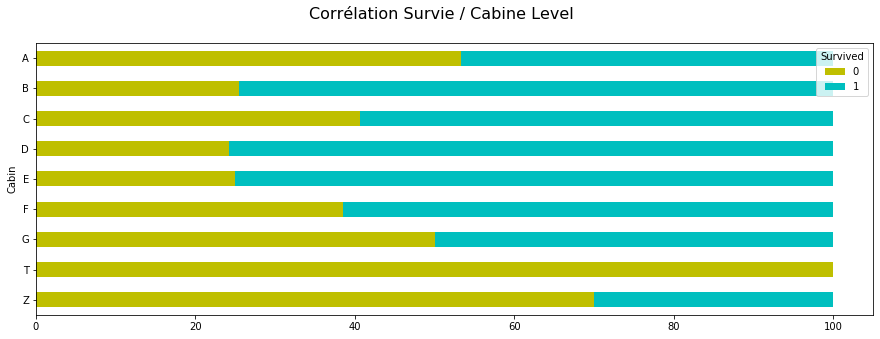

In [1007]:
figure, axes = plt.subplots(nrows=1, ncols=1,figsize=(15, 5))
ax = df.groupby(['Cabin', 'Survived']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(ax = axes, kind='barh',stacked=True, color = 'yc')
ax = ax.invert_yaxis()
figure.suptitle('Corrélation Survie / Cabine Level', fontsize=16)

***Prendre une supposition que les lettre dans cabine représente le niveau dans le Titanic*** 

Pour les passager en cabines de tout les niveau la probabilité de survie étais généralement supérieur par rapport au passager sans cabine (**un minimum de 50 % sauf pour ceux du niveau 'A'**)

Pour ceux des Cabines du niveau 'T' la probabilité de survie étais casi Null

Pour ceux du "Z" supposé sans cabines qui représente déjà 77 % des passager la probabilité de survie fu de 29 %.

# Fonction de Correlation

In [1008]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

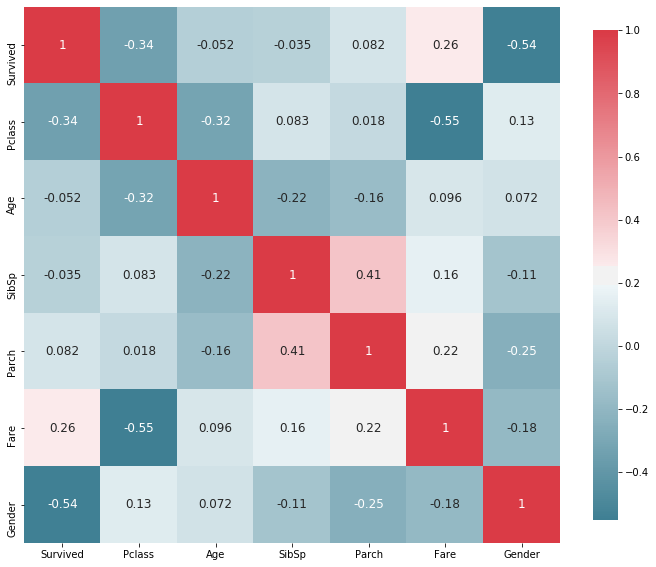

In [1009]:
df['Gender'] = df['Sex']
df['Gender'].replace ({'female' : 0, 'male' : 1},inplace = True)
plot_correlation_map(df)
df.drop('Gender', axis = 1, inplace = True)


The correlation matrix is smaller and leaves out many interesting relationships. **Categorical Features cannot be classified,** for this we have created a **'Gender' feature for 'Sex'**



The first row of the matrix tells you that the **best univariate** predictor of the '**Survived' column is the 'Sex' column. (0.54)**, because women were prioritized during the rescue, followed by **'Pclass'** because the passengers had a survival relation according to their class.

The correlation matrix shows a negative correlation between **'Fare' and the 'Pclass'** of medium strength (-0.55), which is explained by the prices according to the class

**Relation Pclass et survived**

In [1010]:
df.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

**drop the useless columns**

In [1011]:
columns_drop = ['Name', 'SibSp', 'Parch', 'Ticket']
df.drop (columns_drop, axis = 1,  inplace = False)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,2,male,28.0,13.0000,Z,S
1,0,3,male,25.0,7.6500,F,S
2,0,3,male,20.0,7.8542,Z,S
3,0,3,female,29.0,21.0750,Z,S
4,0,1,male,31.0,52.0000,B,S
...,...,...,...,...,...,...,...
886,1,2,female,14.0,30.0708,Z,C
887,0,3,male,22.0,7.2292,Z,C
888,0,3,female,30.0,8.6625,Z,S
889,0,3,male,34.0,7.8958,Z,S


##  Etude du Title

**création du Feature 'Title'**  : 

prendre les lettre de "A a Z" avant la séparation '.' 
expand=False pour un Title par name

In [1012]:
df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand=False)

In [1013]:
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Ms            1
Mme           1
Countess      1
Don           1
Jonkheer      1
Capt          1
Sir           1
Lady          1
Name: Title, dtype: int64

on remarque déjà que **Mlle, Col, Major, Ms, Mme, Countess, Don, Jonkheer,Capt,Sir,Lady** sont très rarement utilisés, 
pour **Dr, Rev** l'utilisation n'atteint pas les 10 passagers

Text(0.5, 0.98, 'Corrélation Title')

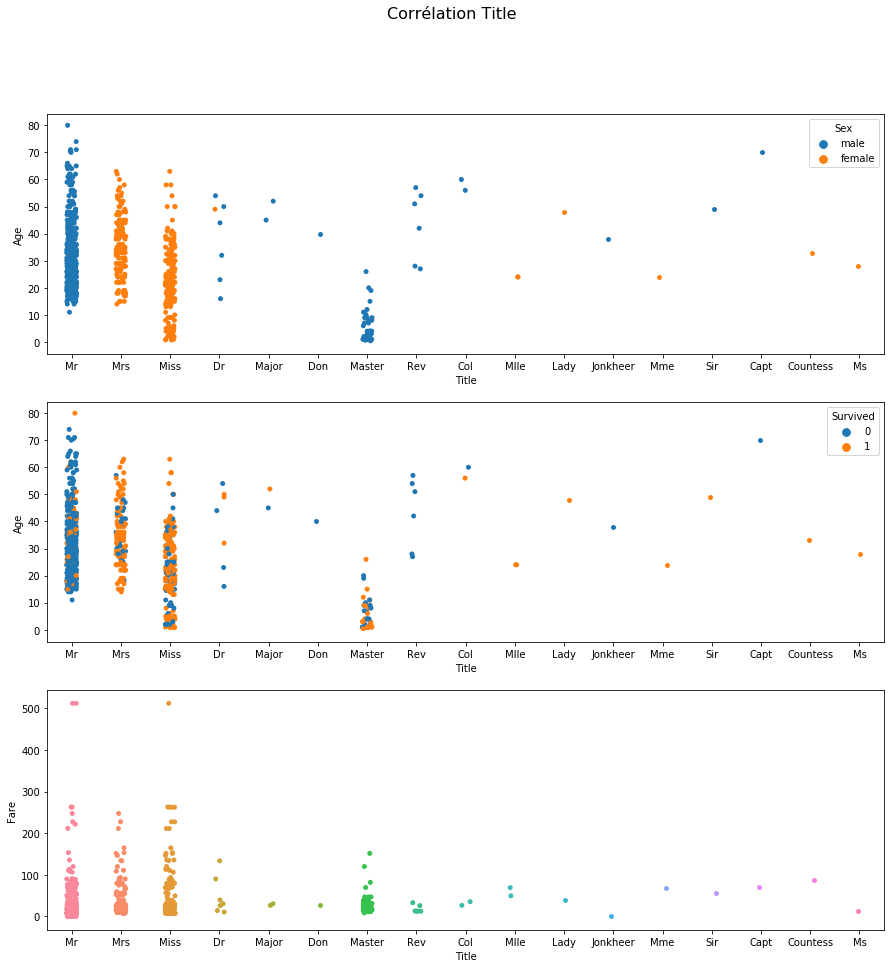

In [1014]:
figure, axes = plt.subplots(nrows=3, ncols=1,figsize=(15, 15))

ax = sns.stripplot(data = df, y = 'Age' , x = 'Title', hue = 'Sex' , ax = axes[0])
ax = sns.stripplot(data = df, y = 'Age' , x = 'Title', hue = 'Survived' , ax = axes[1])

ax = sns.stripplot(data = df, y = 'Fare' , x = 'Title' ,ax = axes[2])

figure.suptitle('Corrélation Title', fontsize=16)

**Observation :**

Principalement les  Title, est considéré comme une approximation du sexe, a l'exception de **Dr avec une seul femme.**

l'Age des Title varié entre **10 et 80 ans**, a l'exception de Miss qui début plus jeune,  le **Master** par contre est relativement jeune excède pas l'âge de **30 ans**.

Aucun des **Capt, Jonkheer er Rev** *n'ait survécu au naufrage*, suivi des Mr avec la plus basse probabilité de survie.

La plupart des Title on payer leur billet moins de 60 pounds alors que **Master et Dr** l'on payer moins de 150 pounds, l'exception chez **Mr, Mrs, et Miss** ou leur majorités ont payer leur billet moins de 250 pounds  avec **deux Mr et Une Miss** qui  ont choisi un billet de plus de 500 pounds 

 **Conclusion :**

Certain Title par leur Fonction a bord du Titanic avait une probabilité de Survie Null.



In [1015]:
Title_Dictionary = {

                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Dr":         "Officer",
                    "Rev":        "Officer",               
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Lady" :      "Royalty",
                    "the Countess" : "Royalty",                  
                    "Dona":       "Royalty",
                    "Mme":        "Miss",
                    "Mlle":       "Miss",
                    "Miss" :      "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mrs",
                    "Mrs" :       "Mrs",
                    "Master" :    "Master"

                    }

df['Title'] = df['Title'].replace(Title_Dictionary)

Text(0.5, 0.98, 'Corrélation Title')

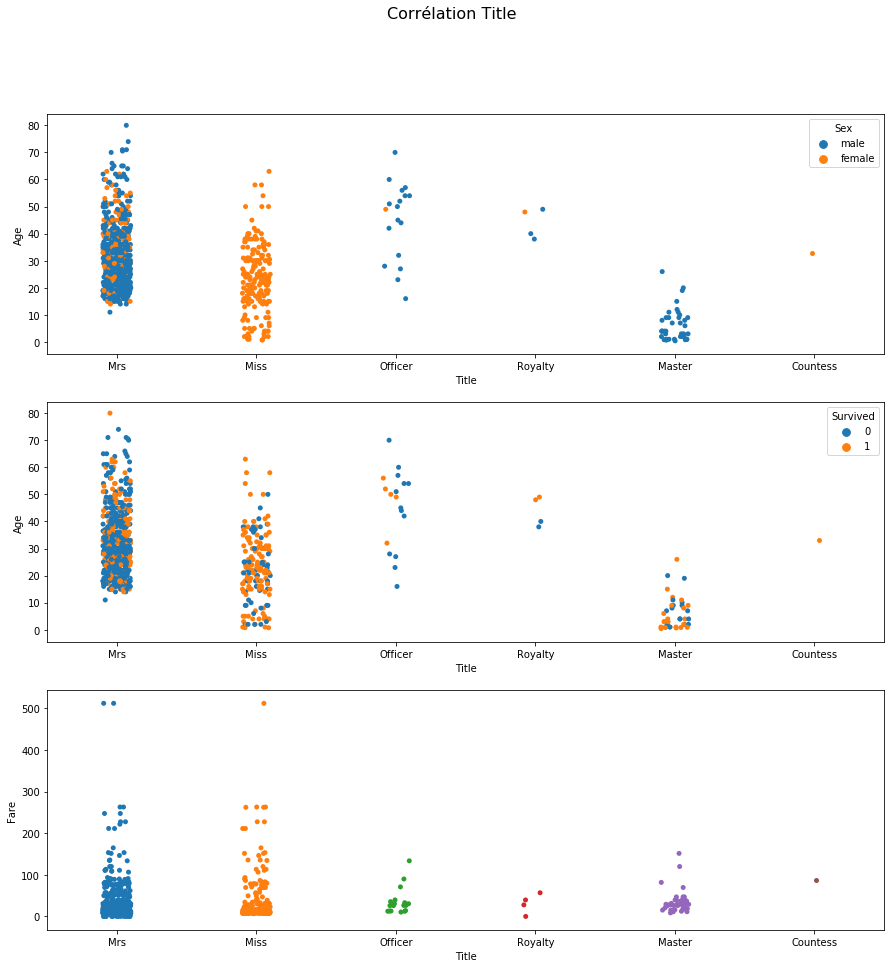

In [1016]:
figure, axes = plt.subplots(nrows=3, ncols=1,figsize=(15, 15))

ax = sns.stripplot(data = df, y = 'Age' , x = 'Title', hue = 'Sex' , ax = axes[0])
ax = sns.stripplot(data = df, y = 'Age' , x = 'Title', hue = 'Survived' , ax = axes[1])
ax = sns.stripplot(data = df, y = 'Fare' , x = 'Title' , ax = axes[2])

figure.suptitle('Corrélation Title', fontsize=16)

Reclassifier cet Feature a montré une certaine granularité dans les types de personnes qui ont mieux survécu au sein du même groupes

Dans les **Officier** y'avais  **une seul femme** la **Dr**,  le même constat pour les **Royalty.**

Probabilité de survie des **Officer** est surtout des **Mrs** est basse , les **Officer** est due a leur Fonction et **Mrs** au nombre important des Male.

## Etude FamilySize

**'SibSp' et Parch '** leur valeur combiné pour nous informer sur la taille d'une Famille.

In [1017]:
df['FamilySize'] = df['SibSp'] + df['Parch']

drop the useless columns

In [1018]:
df.drop(['SibSp'], axis = 1, inplace = True)
df.drop(['Parch'], axis = 1, inplace = True)

Text(0.5, 0.98, 'Corrélation Survie/Title')

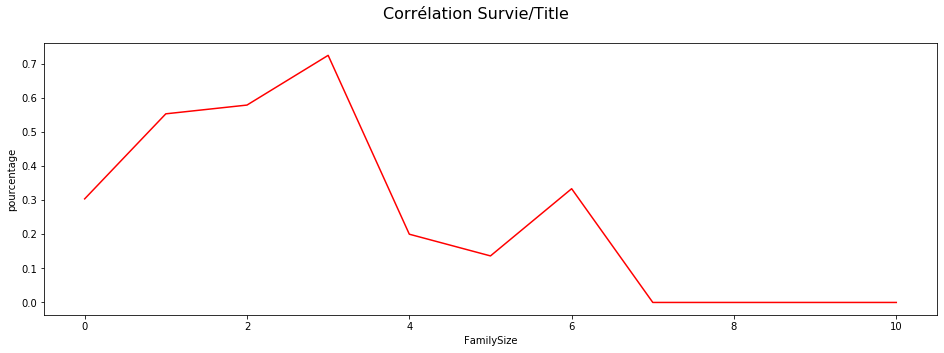

In [1019]:
figure, axes = plt.subplots(nrows=1, ncols=1,figsize=(16, 5))
df.groupby(['FamilySize'])['Survived'].mean().plot( c = 'r')
plt.ylabel('pourcentage')
figure.suptitle('Corrélation Survie/Title', fontsize=16)

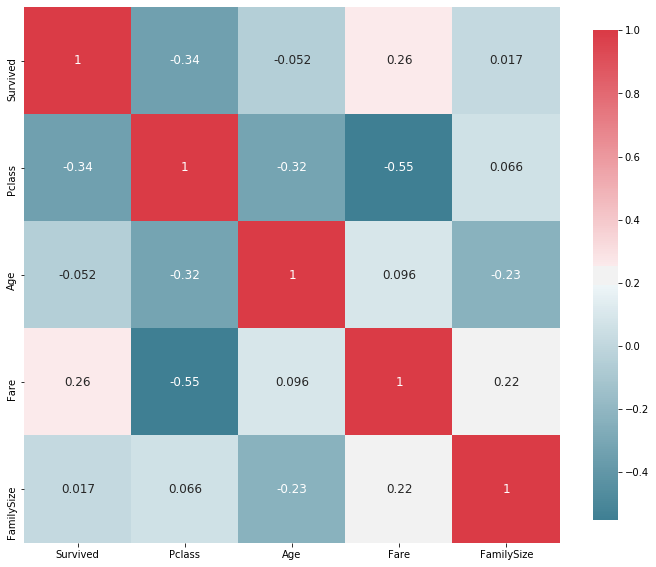

In [1020]:
plot_correlation_map(df)

Il semblerait que la capacité de survie augmente de 0 à 3 personnes, puis se dégringole, on observe que la FamilySize est un factreur négatif a la survie.

**Conclusion :**  

A mon avis **FamilySize** n'est pas très utile la relation semble être non linéaire, le coefficient de corrélation linéaire est **petit 0.017**